In [2]:
import pandas as pd
import requests 
import sys
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
data = pd.read_csv('화성시인프라.csv', encoding='cp949')
data.head(2)

,행정구역,인구수,남자인구수,여자인구수,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,...,의원 수,PC방 수,카페 수,학교 수,학원 수,일반음식점 수,편의점 수,어린이집 수,유치원 수,종합병원 수
0,봉담읍,92823,46958,45865,8298,10731,11389,13631,17139,14590,...,91,42,5,14,222,856,63,78,15,0
1,우정읍,17439,9598,7841,639,1353,1718,1557,2493,3635,...,28,14,1,7,17,348,27,7,5,0


In [4]:
# size = pd.read_csv('data/행정동 면적.csv',encoding='cp949')
# size.head(2)

---

In [5]:
# # 행정구역과 행정동 매칭을 위해 size 데이터프레임의 열 이름 변경
# size = size.rename(columns={'행정동': '행정구역'})
# # data와 size 데이터프레임을 행정구역 기준으로 merge
# data = pd.merge(data, size[['행정구역', '면적']], on='행정구역', how='left')
# data

In [6]:
# # 면적으로 나눌 열들 선택
# cols_to_divide = data.columns.drop(['행정구역','인구수','면적','인구수','남자인구수','여자인구수','0-9세','10-19세','20-29세','30-39세','40-49세','50-59세','60-69세','70-79세','80-89세','90-99세','100세 이상'])

# # 선택된 열들을 면적으로 나누기
# for col in cols_to_divide:
#     data[col] = data[col] / data['면적']
# data.head()

In [7]:
# # 10-19세, 20-29세, 30-39세 인구 합계로 인구수 나누기(청년 인구 비율)
# data['인구수'] = (data['10-19세'] + data['20-29세'] + data['30-39세']) / data['인구수']

In [8]:
data

,행정구역,인구수,남자인구수,여자인구수,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,...,의원 수,PC방 수,카페 수,학교 수,학원 수,일반음식점 수,편의점 수,어린이집 수,유치원 수,종합병원 수
0,봉담읍,92823,46958,45865,8298,10731,11389,13631,17139,14590,...,91,42,5,14,222,856,63,78,15,0
1,우정읍,17439,9598,7841,639,1353,1718,1557,2493,3635,...,28,14,1,7,17,348,27,7,5,0
2,향남읍,85647,46002,39645,8147,10838,9798,13185,17833,12676,...,95,92,10,19,203,1254,84,68,16,1
3,남양읍,55133,29923,25210,4967,4473,7045,9857,9167,8483,...,56,37,4,7,83,773,67,49,7,0
4,매송면,6742,3599,3143,177,403,690,598,765,1348,...,1,3,0,2,7,80,7,1,2,0
5,비봉면,7009,4003,3006,214,331,730,753,790,1268,...,6,2,0,4,5,106,11,2,2,0
6,마도면,6854,4139,2715,168,332,590,719,892,1423,...,4,10,0,4,3,137,28,0,2,0
7,송산면,10830,5948,4882,344,692,894,844,1283,2090,...,16,17,1,5,13,238,24,3,3,0
8,서신면,7114,3955,3159,126,284,469,519,692,1445,...,7,2,0,3,1,266,12,1,2,0
9,팔탄면,9894,6015,3879,259,430,854,954,1305,2175,...,7,21,1,3,1,381,65,5,4,0


---

In [9]:
data = data[['행정구역','인구수','체육시설 수', '병원 수','정류장 수','도서관 수', '노래방 수',
        '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수','의원 수','PC방 수','카페 수','학교 수','학원 수','편의점 수','어린이집 수','유치원 수','일반음식점 수','종합병원 수']]

In [10]:
# 모든 열에 대해 정규화 수행
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 행정구역 열 제외하고 모든 열 정규화
data_normalized = data.copy()
columns_to_normalize = data.columns.drop('행정구역')
data_normalized[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data = data_normalized

In [11]:
data

,행정구역,인구수,체육시설 수,병원 수,정류장 수,도서관 수,노래방 수,"박물관,미술관 수",시장 및 마트 수,약국 수,...,의원 수,PC방 수,카페 수,학교 수,학원 수,편의점 수,어린이집 수,유치원 수,일반음식점 수,종합병원 수
0,봉담읍,1.000000,0.985075,0.333333,0.859375,0.333333,0.830189,0.2,0.830189,0.769231,...,0.957895,0.456522,0.357143,0.736842,0.676829,0.750000,1.000000,0.9375,0.682616,0.0
1,우정읍,0.187874,0.238806,0.333333,0.738281,0.666667,0.226415,0.0,0.226415,0.230769,...,0.294737,0.152174,0.071429,0.368421,0.051829,0.321429,0.089744,0.3125,0.277512,0.0
2,향남읍,0.922692,1.000000,1.000000,1.000000,0.666667,1.000000,0.6,1.000000,1.000000,...,1.000000,1.000000,0.714286,1.000000,0.618902,1.000000,0.871795,1.0000,1.000000,1.0
3,남양읍,0.593958,0.417910,0.666667,0.839844,1.000000,0.622642,0.0,0.622642,0.512821,...,0.589474,0.402174,0.285714,0.368421,0.253049,0.797619,0.628205,0.4375,0.616427,0.0
4,매송면,0.072633,0.074627,0.166667,0.273438,0.333333,0.037736,0.0,0.037736,0.076923,...,0.010526,0.032609,0.000000,0.105263,0.021341,0.083333,0.012821,0.1250,0.063796,0.0
5,비봉면,0.075509,0.104478,0.000000,0.218750,0.333333,0.037736,0.0,0.037736,0.051282,...,0.063158,0.021739,0.000000,0.210526,0.015244,0.130952,0.025641,0.1250,0.084530,0.0
6,마도면,0.073839,0.059701,0.333333,0.402344,0.666667,0.075472,0.0,0.075472,0.051282,...,0.042105,0.108696,0.000000,0.210526,0.009146,0.333333,0.000000,0.1250,0.109250,0.0
7,송산면,0.116674,0.208955,0.000000,0.566406,0.333333,0.207547,0.0,0.207547,0.128205,...,0.168421,0.184783,0.071429,0.263158,0.039634,0.285714,0.038462,0.1875,0.189793,0.0
8,서신면,0.076640,0.044776,0.166667,0.636719,0.000000,0.169811,0.0,0.169811,0.051282,...,0.073684,0.021739,0.000000,0.157895,0.003049,0.142857,0.012821,0.1250,0.212121,0.0
9,팔탄면,0.106590,0.149254,0.166667,0.679688,0.333333,0.358491,0.0,0.358491,0.153846,...,0.073684,0.228261,0.071429,0.157895,0.003049,0.773810,0.064103,0.2500,0.303828,0.0


데이터 크기: (30, 21)

기본 통계량:
             인구수     체육시설 수       병원 수      정류장 수      도서관 수      노래방 수  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean    0.337309   0.281095   0.233333   0.341276   0.322222   0.252830   
std     0.254436   0.254414   0.282300   0.277292   0.269572   0.279356   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.110032   0.108209   0.000000   0.132812   0.000000   0.075472   
50%     0.327123   0.186567   0.166667   0.265625   0.333333   0.141509   
75%     0.494180   0.384328   0.291667   0.532227   0.333333   0.320755   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

       박물관,미술관 수  시장 및 마트 수       약국 수      영화관 수       의원 수      PC방 수  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean    0.060000   0.252830   0.269231   0.097917   0.321754   0.162681   
std     0.211073   0.279356   0.247937   0.215686   0.302600   0.212510  

C:\Users\mwj05\AppData\Local\Temp\ipykernel_15464\2871385725.py:24: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mwj05\AppData\Local\Temp\ipykernel_15464\2871385725.py:24: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mwj05\AppData\Local\Temp\ipykernel_15464\2871385725.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mwj05\AppData\Local\Temp\ipykernel_15464\2871385725.py:24: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mwj05\AppData\Local\Temp\ipykernel_15464\2871385725.py:24: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mwj05\AppData\Local\Temp\ipykernel_15464\2871385725.py:24: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from fon

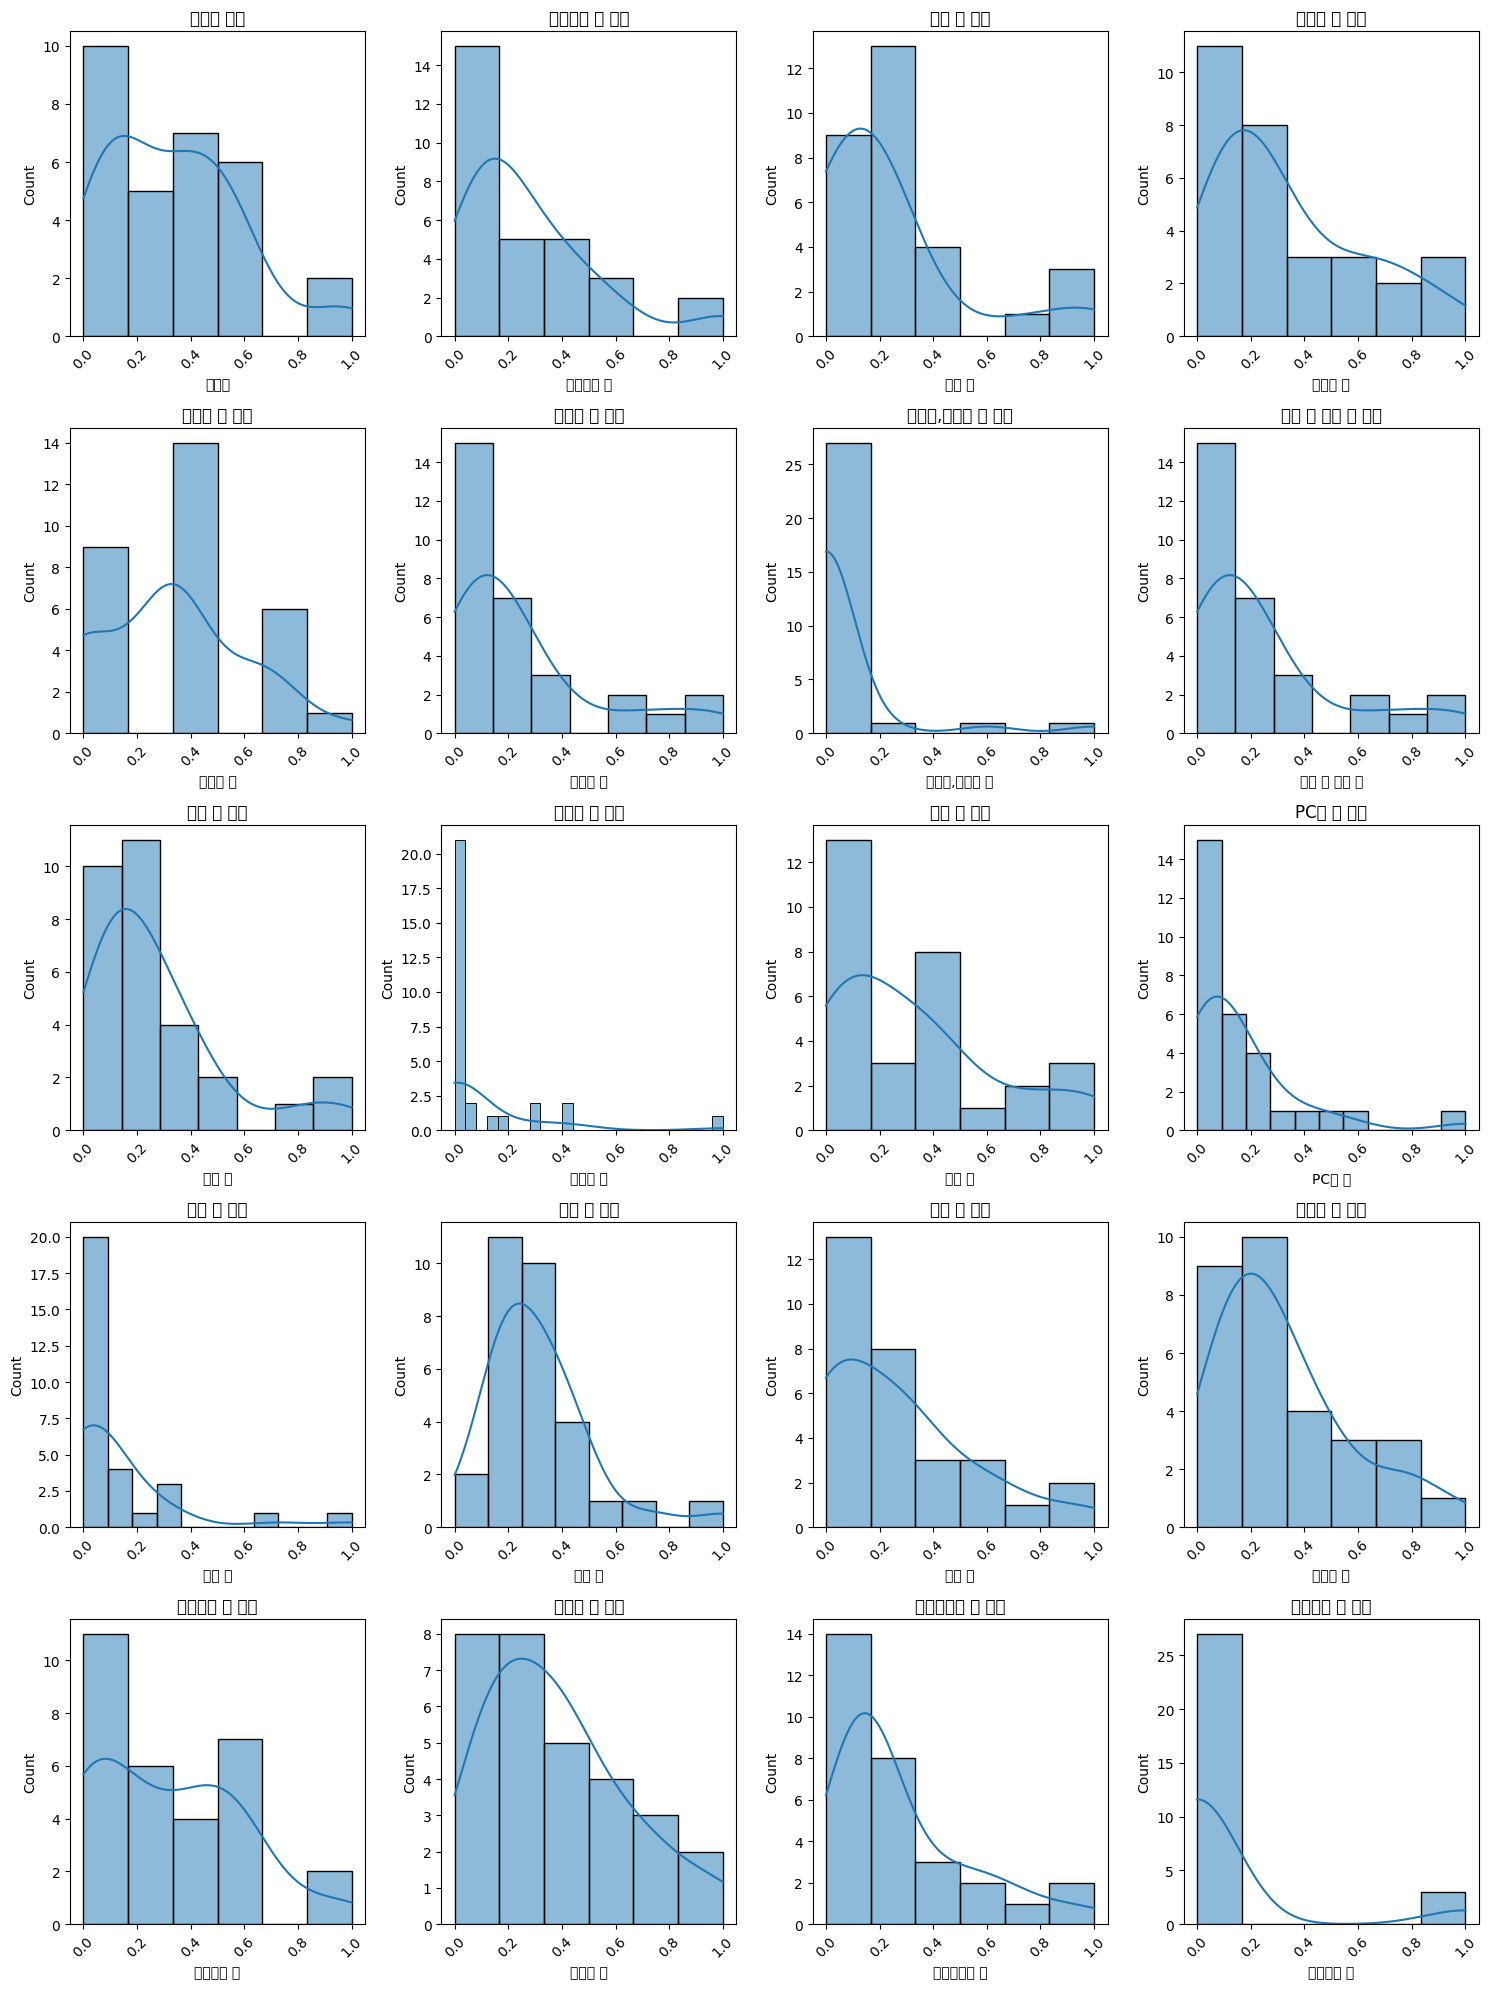

d:\system\conda\contest\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\system\conda\contest\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\system\conda\contest\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\system\conda\contest\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\system\conda\contest\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

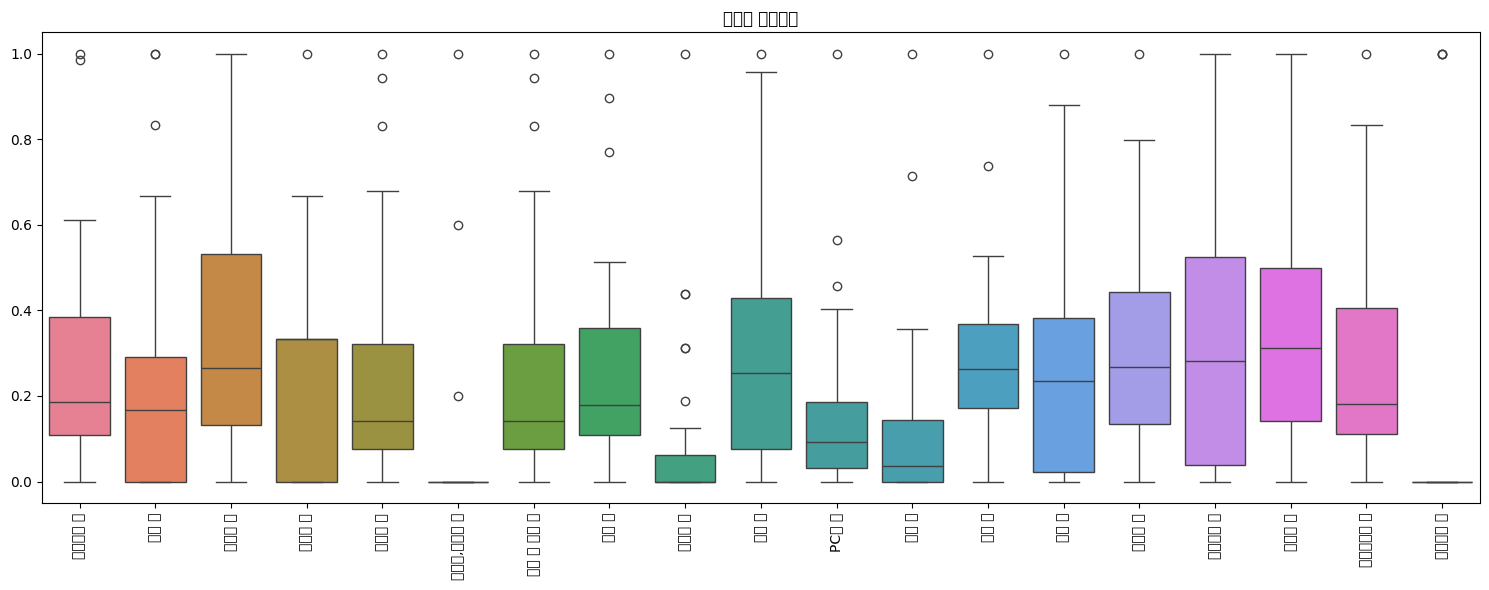

In [12]:
# 데이터 기본 정보 확인
print("데이터 크기:", data.shape)
print("\n기본 통계량:")
print(data.describe())

print("\n결측치 확인:")
print(data.isnull().sum())

# 각 변수의 분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 변수들의 분포 확인
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4*n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'{col} 분포')
    plt.xticks(rotation=45)
plt.tight_layout()

# 박스플롯으로 이상치 확인
plt.figure(figsize=(15, 6))
sns.boxplot(data=data[numeric_cols].drop('인구수', axis = 1))
plt.xticks(rotation=90)
plt.title('변수별 박스플롯')
plt.tight_layout()


In [13]:
import matplotlib as mpl
print(mpl.matplotlib_fname())

d:\system\conda\contest\Lib\site-packages\matplotlib\mpl-data\matplotlibrc


<Axes: >

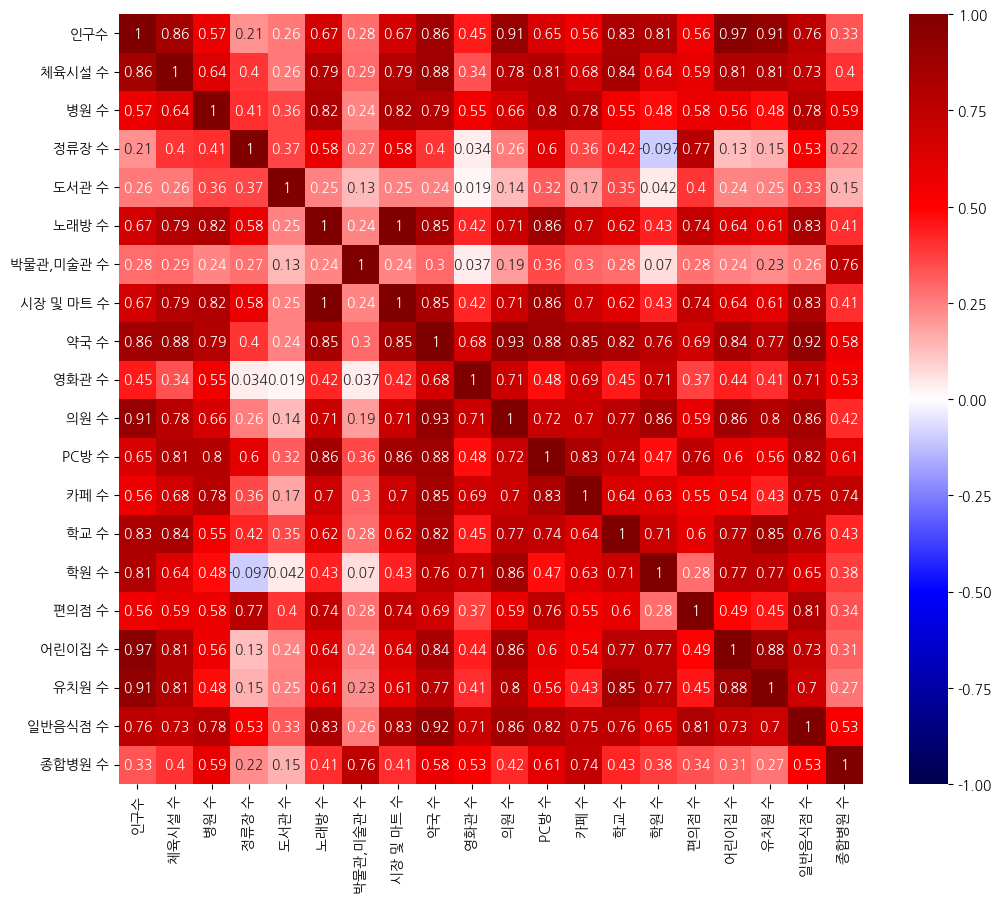

In [14]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

corrMat = data[['인구수','체육시설 수', '병원 수','정류장 수','도서관 수', '노래방 수',
        '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수','의원 수','PC방 수','카페 수',
        '학교 수','학원 수','편의점 수','어린이집 수','유치원 수','일반음식점 수','종합병원 수']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrMat, cmap='seismic', annot=True, vmin = -1, vmax = 1)

In [15]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_data = vif_data.sort_values('VIF', ascending=False)
    return vif_data

# 분석에 사용할 변수들 선택
features = ['체육시설 수', '병원 수','도서관 수', '노래방 수',
        '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수','의원 수','PC방 수','카페 수','학교 수','학원 수','편의점 수','어린이집 수','유치원 수','일반음식점 수','종합병원 수']

# VIF 계산
vif_result = calculate_vif(data[features])
print("VIF 값:")
print(vif_result)

# VIF가 10을 넘는 변수들 확인
high_vif = vif_result[vif_result['VIF'] > 10]
if len(high_vif) > 0:
    print("\n다중공선성이 의심되는 변수들 (VIF > 10):")
    print(high_vif)
else:
    print("\n심각한 다중공선성 문제 없음")
high_vif

VIF 값:
     Variable         VIF
5   시장 및 마트 수         inf
3       노래방 수         inf
6        약국 수  319.719202
8        의원 수   70.640726
15      유치원 수   69.355368
16    일반음식점 수   61.841544
17     종합병원 수   46.094666
11       학교 수   36.991279
10       카페 수   36.930012
0      체육시설 수   35.728349
12       학원 수   29.625165
14     어린이집 수   27.384618
9       PC방 수   21.619791
4   박물관,미술관 수   19.950542
13      편의점 수   15.769990
7       영화관 수   15.681927
1        병원 수   12.914479
2       도서관 수    4.387761

다중공선성이 의심되는 변수들 (VIF > 10):
     Variable         VIF
5   시장 및 마트 수         inf
3       노래방 수         inf
6        약국 수  319.719202
8        의원 수   70.640726
15      유치원 수   69.355368
16    일반음식점 수   61.841544
17     종합병원 수   46.094666
11       학교 수   36.991279
10       카페 수   36.930012
0      체육시설 수   35.728349
12       학원 수   29.625165
14     어린이집 수   27.384618
9       PC방 수   21.619791
4   박물관,미술관 수   19.950542
13      편의점 수   15.769990
7       영화관 수   15.681927
1        병원 수   12.914479


d:\system\conda\contest\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
5,시장 및 마트 수,inf
3,노래방 수,inf
6,약국 수,319.719202
8,의원 수,70.640726
15,유치원 수,69.355368
16,일반음식점 수,61.841544
17,종합병원 수,46.094666
11,학교 수,36.991279
10,카페 수,36.930012
0,체육시설 수,35.728349


In [16]:
# 청년 인구 비율 데이터를 y로, 나머지 데이터 중 상관관계가 거의 없는 것과 행정동 제외, 다중공선성은 일단 고려 X
drop_columns = ['인구수','행정구역','정류장 수','영화관 수','종합병원 수']

In [17]:
# # test: 송산면
# test = data[data['행정구역'] == '송산면']
# train = data[data['행정구역'] != '송산면']

# y_test = test['인구수']
# X_test = test.drop(drop_columns, axis = 1)

# y_train = train['인구수']
# X_train = train.drop(drop_columns, axis = 1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(drop_columns, axis = 1), data['인구수'], test_size=0.2, random_state=0)

In [19]:
y_train = y_train.astype('float')
y_test = y_test.astype('float')

In [20]:
y_train

27    0.361678
11    0.042942
17    0.401668
22    0.440753
5     0.075509
16    0.247848
8     0.076640
14    0.543885
23    0.575170
20    0.543788
1     0.187874
29    0.000000
6     0.073839
4     0.072633
18    0.173545
19    0.292568
9     0.106590
7     0.116674
25    0.465908
3     0.593958
0     1.000000
21    0.370382
15    0.393642
12    0.118990
Name: 인구수, dtype: float64

In [21]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')
#데이터를 float 형으로 변환

In [22]:
X_train.dtypes

체육시설 수       float64
병원 수         float64
도서관 수        float64
노래방 수        float64
박물관,미술관 수    float64
시장 및 마트 수    float64
약국 수         float64
의원 수         float64
PC방 수        float64
카페 수         float64
학교 수         float64
학원 수         float64
편의점 수        float64
어린이집 수       float64
유치원 수        float64
일반음식점 수      float64
dtype: object

## 회귀

In [23]:
from sklearn.linear_model import LinearRegression
#선형 회귀 모델을 불러오기 위한 라이브러리
Lin_model = LinearRegression()
#선형 회귀 모델 정의
Lin_model.fit(X_train, y_train)

LinearRegression()

In [24]:
Lin_model.coef_
# 선형회귀 함수의 계수

array([ 0.18863515, -0.0193897 ,  0.08336091,  0.11931592,  0.09805138,
        0.11931592, -0.61861944,  0.46962508, -0.20855957,  0.01138312,
       -0.00870348,  0.25598243,  0.11187483,  0.50430865,  0.01256803,
       -0.15928954])

In [25]:
Lin_model.intercept_
# 선형회귀 함수의 상수항

np.float64(0.02245712559103702)

In [26]:
y_pred_train = Lin_model.predict(X_train)
y_pred_test = Lin_model.predict(X_test)

In [27]:
def RMSE(y_true, y_pred):
  output = np.sqrt(np.mean((y_true - y_pred)**2))
  return output

In [28]:
LR_RMSE1 = RMSE(np.array(y_train), y_pred_train)
LR_RMSE1

np.float64(0.01771917860177774)

In [29]:
LR_RMSE2 = RMSE(y_test, y_pred_test)
LR_RMSE2

np.float64(0.08474305855452623)

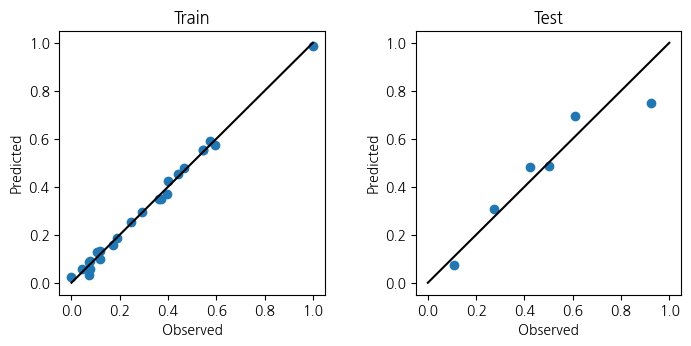

In [30]:
# x 범위를 y_train과 y_test의 최소값과 최대값에 맞추기
x_min = min(y_train.min(), y_test.min())
x_max = max(y_train.max(), y_test.max())
x = np.linspace(x_min, x_max, 100)  # x값을 최소값에서 최대값까지 100개로 설정
y = x  # y = x 설정

# 그래프 그리기
fig, axs = plt.subplots(1, 2)  # 1행 2열의 서브플롯 만들기
plt.tight_layout(h_pad=3, w_pad=3)  # 안겹치게 높이, 너비 3만큼 띄우기
fig.set_size_inches(7, 3)  # 전체 크기는 7, 3인치

# 훈련 데이터 그래프
axs[0].plot(y_train, y_pred_train, 'o')  # 훈련 데이터 예측 결과 점 찍기
axs[0].plot(x, y, 'k')  # y=x 선을 검은색으로 그리기
axs[0].set_title('Train')
axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

# 테스트 데이터 그래프
axs[1].plot(y_test, y_pred_test, 'o')  # 테스트 데이터 예측 결과 점 찍기
axs[1].plot(x, y, 'k')  # y=x 선을 검은색으로 그리기
axs[1].set_title('Test')
axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')

plt.show()


## 의사결정나무

In [31]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
Tree_model = DecisionTreeRegressor(random_state = 40, max_depth=3) #트리 모델 정의
Tree_model.fit(X_train, y_train) #학습

DecisionTreeRegressor(max_depth=3, random_state=40)

In [32]:
Tree_pred_train = Tree_model.predict(X_train)
Tree_pred_test = Tree_model.predict(X_test)

In [33]:
RMSE(y_train, Tree_pred_train)

np.float64(0.03429080325202882)

In [34]:
RMSE(y_test, Tree_pred_test)

np.float64(0.10447878404366567)

In [35]:
Tree_model.feature_importances_

array([0.0140699 , 0.        , 0.02933602, 0.        , 0.        ,
       0.        , 0.        , 0.68951615, 0.        , 0.        ,
       0.18474814, 0.0765069 , 0.        , 0.        , 0.00582289,
       0.        ])

In [36]:
X_train.columns

Index(['체육시설 수', '병원 수', '도서관 수', '노래방 수', '박물관,미술관 수', '시장 및 마트 수', '약국 수',
       '의원 수', 'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', '유치원 수',
       '일반음식점 수'],
      dtype='object')

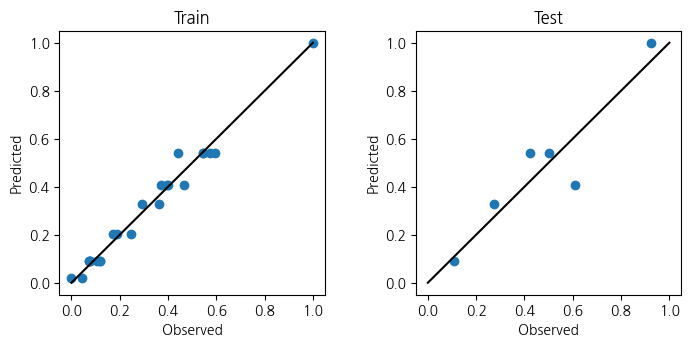

In [37]:
x_min = min(y_train.min(), y_test.min())
x_max = max(y_train.max(), y_test.max())
x = np.linspace(x_min, x_max, 100)  # x값을 최소값에서 최대값까지 100개로 설정
y = x  # y = x 설정

#모델의 결과를 그림으로 그리기
fig, axs = plt.subplots(1,2) #1, 2 크기로 만들기
plt.tight_layout(h_pad=3, w_pad=3) #안겹치게, 높이, 너비 3 크기씩 띄워서
fig.set_size_inches(7,3) #크기는 7, 3 인치

axs[0].plot(y_train, Tree_pred_train, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[0].set_title('Train')

axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

axs[1].plot(y_test, Tree_pred_test, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[1].set_title('Test')

axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')
plt.show()

[Text(0.5769230769230769, 0.875, '의원 수 <= 0.316\nsquared_error = 0.056\nsamples = 24\nvalue = 0.303'),
 Text(0.3076923076923077, 0.625, '학원 수 <= 0.046\nsquared_error = 0.01\nsamples = 14\nvalue = 0.139'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, '유치원 수 <= 0.094\nsquared_error = 0.001\nsamples = 9\nvalue = 0.076'),
 Text(0.07692307692307693, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 0.021'),
 Text(0.23076923076923078, 0.125, 'squared_error = 0.0\nsamples = 7\nvalue = 0.092'),
 Text(0.46153846153846156, 0.375, '체육시설 수 <= 0.201\nsquared_error = 0.005\nsamples = 5\nvalue = 0.253'),
 Text(0.38461538461538464, 0.125, 'squared_error = 0.001\nsamples = 2\nvalue = 0.327'),
 Text(0.5384615384615384, 0.125, 'squared_error = 0.001\nsamples = 3\nvalue = 0.203'),
 Text(0.8461538461538461, 0.625, '학교 수 <= 0.632\nsquared_error = 0.03\nsamples = 10\nvalue = 0.533'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.7692307692307693, 0.375, '도서관 수 <= 0.167\n

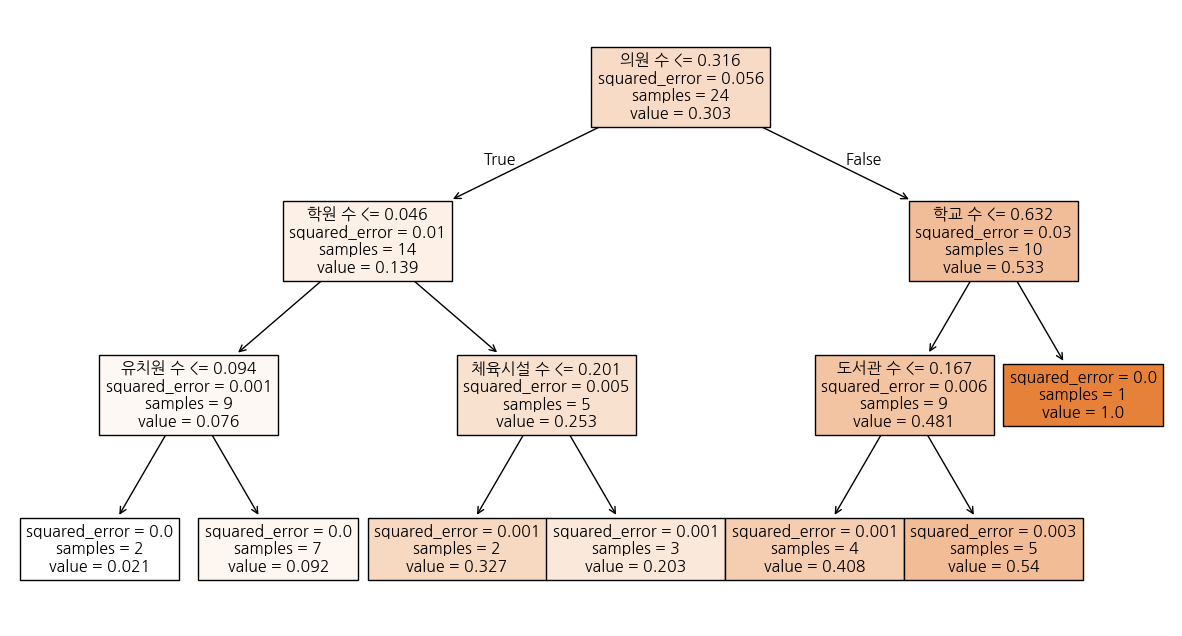

In [38]:
plt.figure(figsize = (15,8))
plot_tree(Tree_model, feature_names = X_train.columns, filled=True)
#트리 구조를 보여준다. 값을 만족하면 왼쪽, 불만족하면 오른쪽에 놓는다.

## 랜덤포레스트

In [39]:
from sklearn.ensemble import RandomForestRegressor
#랜덤 포레스트를 위한 라이브러리

RF_model = RandomForestRegressor(random_state = 40, n_estimators = 20, max_depth=3) #랜덤 포레스트 정의.
RF_model.fit(X_train, y_train) #학습

RandomForestRegressor(max_depth=3, n_estimators=20, random_state=40)

In [40]:
RF_pred_train = RF_model.predict(X_train)
RF_pred_test = RF_model.predict(X_test)

In [41]:
RMSE(np.array(y_train), RF_pred_train)

np.float64(0.039722691478347644)

In [42]:
RMSE(np.array(y_test), RF_pred_test)

np.float64(0.07803199383935198)

In [43]:
RF_model.feature_importances_

array([0.03074396, 0.00549341, 0.01163486, 0.03391226, 0.00889458,
       0.00070635, 0.0169891 , 0.31847881, 0.0019512 , 0.        ,
       0.02027463, 0.16270409, 0.01077529, 0.36199872, 0.01252768,
       0.00291506])

In [44]:
X_train.columns

Index(['체육시설 수', '병원 수', '도서관 수', '노래방 수', '박물관,미술관 수', '시장 및 마트 수', '약국 수',
       '의원 수', 'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', '유치원 수',
       '일반음식점 수'],
      dtype='object')

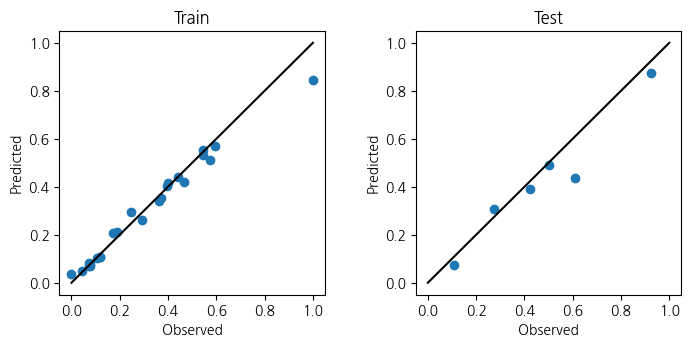

In [45]:
x_min = min(y_train.min(), y_test.min())
x_max = max(y_train.max(), y_test.max())
x = np.linspace(x_min, x_max, 100)  # x값을 최소값에서 최대값까지 100개로 설정
y = x  # y = x 설정

#모델의 결과를 그림으로 그리기
fig, axs = plt.subplots(1,2) #1, 2 크기로 만들기
plt.tight_layout(h_pad=3, w_pad=3) #안겹치게, 높이, 너비 3 크기씩 띄워서
fig.set_size_inches(7,3) #크기는 7, 3 인치

axs[0].plot(y_train, RF_pred_train, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[0].set_title('Train')

axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

axs[1].plot(y_test, RF_pred_test, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[1].set_title('Test')

axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')

plt.show()

### 그리드 서치

In [46]:
from sklearn.model_selection import GridSearchCV #그리드 서치 라이브러리
from sklearn import metrics #평가지표 판단에 쓰는 라이브러리

RF_model = RandomForestRegressor()

RMSE_scorer = metrics.make_scorer(RMSE, greater_is_better = False)
#평가함수. RMSE로 평가할거임. 값이 큰 것이 좋은게 아니므로(오차를 나타내므로 작은게 좋다) False

RF_params = {'random_state' : [40], 'n_estimators': list(range(5, 51, 5)), 'max_depth': list(range(2, 6, 1))}
#랜덤성 고정시키고 샘플링을 5~50 5단위로(즉, 5, 10, 15, ..), 최대 깊이를 2~5 1단위로 (즉, 2, 3, 4, 5)

In [47]:
GS_RF_model = GridSearchCV(estimator = RF_model,
                           param_grid = RF_params,
                           scoring = RMSE_scorer,
                           cv = 5)
     

In [48]:
GS_RF_model.fit(X_train, y_train)

d:\system\conda\contest\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50],
                         'random_state': [40]},
             scoring=make_scorer(RMSE, greater_is_better=False, response_method='predict'))

In [49]:
GS_RF_model.best_params_

{'max_depth': 3, 'n_estimators': 25, 'random_state': 40}

In [50]:
GS_RF_pred_test = GS_RF_model.best_estimator_.predict(X_test)
GS_RF_pred_train = GS_RF_model.best_estimator_.predict(X_train)

In [51]:
RF_RMSE1 = RMSE(y_train, GS_RF_pred_train)
RF_RMSE1

np.float64(0.0451194355233886)

In [52]:
RF_RMSE2 = RMSE(y_test, GS_RF_pred_test)
RF_RMSE2

np.float64(0.08357302113031716)

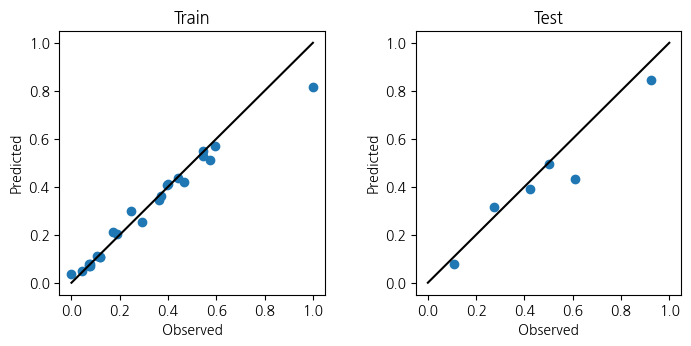

In [53]:
x_min = min(y_train.min(), y_test.min())
x_max = max(y_train.max(), y_test.max())
x = np.linspace(x_min, x_max, 100)  # x값을 최소값에서 최대값까지 100개로 설정
y = x  # y = x 설정

fig, axs = plt.subplots(1,2) #1, 2 크기로 만들기
plt.tight_layout(h_pad=3, w_pad=3) #안겹치게, 높이, 너비 3 크기씩 띄워서
fig.set_size_inches(7,3) #크기는 7, 3 인치

axs[0].plot(y_train, GS_RF_pred_train, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[0].set_title('Train')

axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

axs[1].plot(y_test, GS_RF_pred_test, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[1].set_title('Test')

axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')

plt.show()

In [54]:
RF_model = RandomForestRegressor(random_state = 40, n_estimators = 25, max_depth=5) #랜덤 포레스트 정의.
RF_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=25, random_state=40)

In [55]:
RF_model.feature_importances_

array([0.05769588, 0.00592067, 0.01324365, 0.02760978, 0.03037515,
       0.01279724, 0.00717699, 0.27618432, 0.01194781, 0.00136953,
       0.02226269, 0.237998  , 0.00336322, 0.27942796, 0.01077751,
       0.00184958])

In [56]:
X_train.columns

Index(['체육시설 수', '병원 수', '도서관 수', '노래방 수', '박물관,미술관 수', '시장 및 마트 수', '약국 수',
       '의원 수', 'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', '유치원 수',
       '일반음식점 수'],
      dtype='object')

### 의사결정나무 그리드서치

In [57]:
DT_model = DecisionTreeRegressor()

DT_params = {'random_state' : [40], 'max_depth' : list(range(4,6))}

GS_DT_model = GridSearchCV(estimator = DT_model, #학습 모델
                           param_grid = DT_params, #서치할 파라미터
                           scoring = RMSE_scorer, #평가지표
                           cv = 10) #교차검증
GS_DT_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5], 'random_state': [40]},
             scoring=make_scorer(RMSE, greater_is_better=False, response_method='predict'))

In [58]:
GS_DT_model.best_params_

{'max_depth': 4, 'random_state': 40}

In [59]:
GS_DT_pred_train = GS_DT_model.best_estimator_.predict(X_train)
GS_DT_pred_test = GS_DT_model.best_estimator_.predict(X_test)

In [60]:
DT_RMSE1 = RMSE(np.array(y_train), GS_DT_pred_train)
DT_RMSE1

np.float64(0.010332706361257205)

In [61]:
DT_RMSE2 = RMSE(np.array(y_test), GS_DT_pred_test)
DT_RMSE2

np.float64(0.12120825969588397)

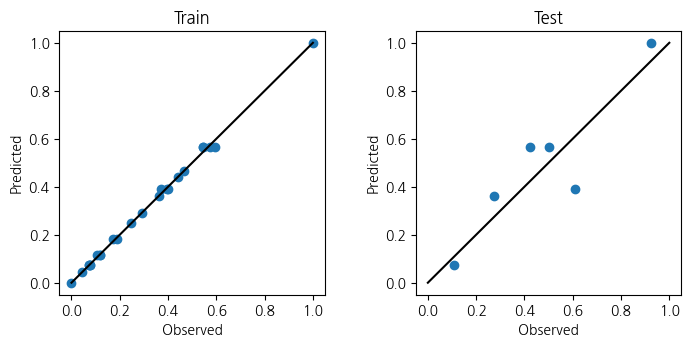

In [62]:
x_min = min(y_train.min(), y_test.min())
x_max = max(y_train.max(), y_test.max())
x = np.linspace(x_min, x_max, 100)  # x값을 최소값에서 최대값까지 100개로 설정
y = x  # y = x 설정

#모델의 결과를 그림으로 그리기
fig, axs = plt.subplots(1,2) #1, 2 크기로 만들기
plt.tight_layout(h_pad=3, w_pad=3) #안겹치게, 높이, 너비 3 크기씩 띄워서
fig.set_size_inches(7,3) #크기는 7, 3 인치

axs[0].plot(y_train, GS_DT_pred_train, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[0].set_title('Train')

axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

axs[1].plot(y_test, GS_DT_pred_test, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[1].set_title('Test')

axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')

plt.show()

In [63]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
Tree_model = DecisionTreeRegressor(random_state = 40, max_depth=4) #트리 모델 정의
Tree_model.fit(X_train, y_train) #학습

DecisionTreeRegressor(max_depth=4, random_state=40)

[Text(0.6041666666666666, 0.9, '의원 수 <= 0.316\nsquared_error = 0.056\nsamples = 24\nvalue = 0.303'),
 Text(0.3333333333333333, 0.7, '학원 수 <= 0.046\nsquared_error = 0.01\nsamples = 14\nvalue = 0.139'),
 Text(0.46875, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, '유치원 수 <= 0.094\nsquared_error = 0.001\nsamples = 9\nvalue = 0.076'),
 Text(0.08333333333333333, 0.3, '학교 수 <= 0.079\nsquared_error = 0.0\nsamples = 2\nvalue = 0.021'),
 Text(0.041666666666666664, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.125, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 0.043'),
 Text(0.25, 0.3, '노래방 수 <= 0.189\nsquared_error = 0.0\nsamples = 7\nvalue = 0.092'),
 Text(0.20833333333333334, 0.1, 'squared_error = 0.0\nsamples = 4\nvalue = 0.075'),
 Text(0.2916666666666667, 0.1, 'squared_error = 0.0\nsamples = 3\nvalue = 0.114'),
 Text(0.5, 0.5, '어린이집 수 <= 0.244\nsquared_error = 0.005\nsamples = 5\nvalue = 0.253'),
 Text(0.4166666666666667, 0.3, 'PC방 수 <= 0.158\nsquared_error = 0.001\nsamp

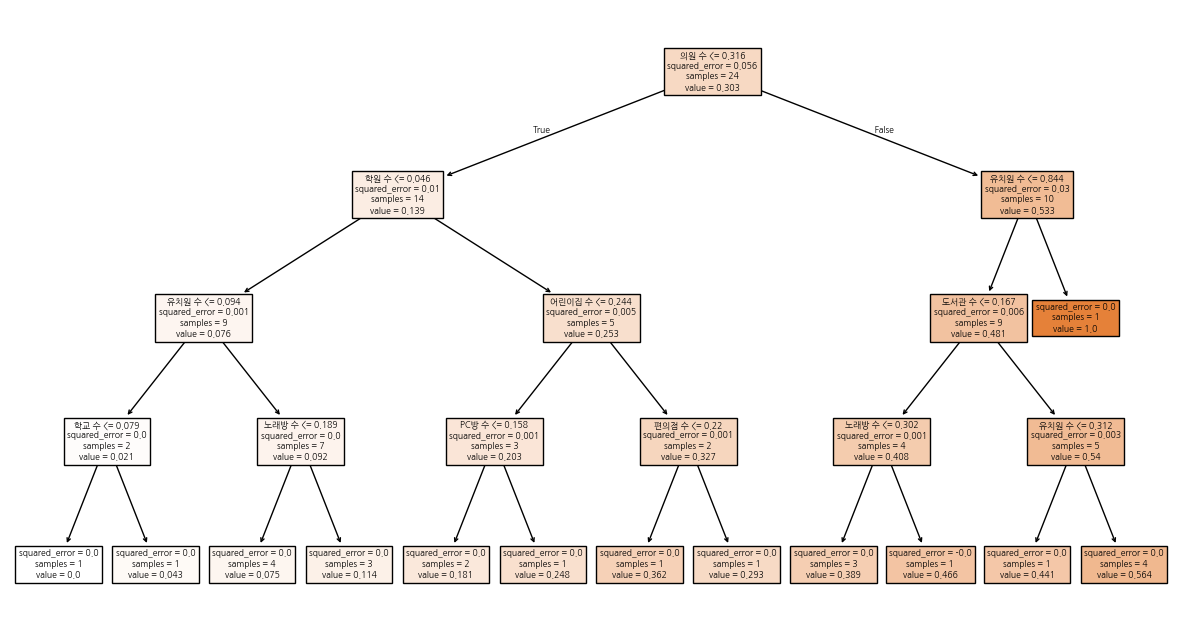

In [64]:
plt.figure(figsize = (15,8))
plot_tree(Tree_model, feature_names = X_train.columns, filled=True)
#트리 구조를 보여준다. 값을 만족하면 왼쪽, 불만족하면 오른쪽에 놓는다

In [65]:
Tree_model.feature_importances_

array([0.        , 0.        , 0.02877336, 0.00534602, 0.        ,
       0.        , 0.        , 0.67629125, 0.00224633, 0.        ,
       0.00068921, 0.0750395 , 0.00178514, 0.01380004, 0.19602914,
       0.        ])

In [66]:
X_train.columns

Index(['체육시설 수', '병원 수', '도서관 수', '노래방 수', '박물관,미술관 수', '시장 및 마트 수', '약국 수',
       '의원 수', 'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', '유치원 수',
       '일반음식점 수'],
      dtype='object')

In [67]:
# 데이터를 딕셔너리 형태로 구성
rmse_data = {
    'training set': [LR_RMSE1, DT_RMSE1, RF_RMSE1],
    'test set': [LR_RMSE2, DT_RMSE2, RF_RMSE2]
}

# 인덱스 추가
rmse_df = pd.DataFrame(rmse_data, index=['Linear Regression', 'Decision Tree', 'Random Forest'])
rmse_df

,training set,test set
Linear Regression,0.017719,0.084743
Decision Tree,0.010333,0.121208
Random Forest,0.045119,0.083573


---

### 분석

---

### 예측

In [68]:
pred_data = pd.read_csv('화성시인프라.csv', encoding='cp949')

scaler = MinMaxScaler()
# 행정구역 열 제외하고 모든 열 정규화
pred_normalized = pred_data.copy()
columns_to_normalize = pred_data.columns.drop('행정구역','인구수')
pred_normalized[columns_to_normalize] = scaler.fit_transform(pred_data[columns_to_normalize])
pred_normalized['인구수'] = scaler.fit_transform(pred_data['인구수'].values.reshape(-1,1))
pred_data = pred_normalized

# pred_data = pred_data[pred_data['행정구역']=='매송면'] # 매송면

pred_data.drop(['0-9세','10-19세','20-29세','30-39세','40-49세','50-59세','60-69세','70-79세','80-89세','90-99세','100세 이상','남자인구수',
                '여자인구수','정류장 수','영화관 수','종합병원 수'], axis=1, inplace=True)

pred_x = pred_data[['체육시설 수', '병원 수', '도서관 수', '노래방 수','박물관,미술관 수', '시장 및 마트 수', '약국 수', '의원 수', 'PC방 수',
                   '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', '유치원 수', '일반음식점 수']]
pred_y = pred_data['인구수']

res = GS_RF_model.predict(pred_x)
res_unscaled = scaler.inverse_transform([res])
print(res_unscaled)

[[75835.99733333 18792.0552381  78599.51333333 52844.19803175
   6278.92873304  7286.77920924  7111.91120924  9913.89079365
   6449.98654257 10164.18079365  7174.10606638  4385.5222886
  10015.61479365 29333.05326984 49140.3        37879.84346032
  27717.40660317 38304.91755556 19563.52698413 23374.47038095
  50838.61669841 33422.65946032 40628.64679365 47392.204
  45832.18971429 38913.08079365 40017.05057143 32059.68526984
  36314.76412698  3341.21251082]]


In [69]:
# pred_data = pd.read_csv('화성시인프라_소은민우.csv', encoding='cp949')

# scaler_x = MinMaxScaler()
# scaler_y = MinMaxScaler()
# # 행정구역 열 제외하고 모든 열 정규화
# pred_normalized = pred_data.copy()
# columns_to_normalize = pred_data.columns.drop('행정구역','인구수')
# pred_normalized[columns_to_normalize] = scaler_x.fit_transform(pred_data[columns_to_normalize])
# pred_normalized['인구수'] = scaler_y.fit_transform(pred_data['인구수'].values.reshape(-1,1))
# pred_data = pred_normalized

# # pred_data = pred_data[pred_data['행정구역']=='매송면'] # 매송면

# pred_data.drop(['0-9세','10-19세','20-29세','30-39세','40-49세','50-59세','60-69세','70-79세','80-89세','90-99세','100세 이상','남자인구수','여자인구수','박물관,미술관 수','영화관 수','종합병원 수'], axis=1, inplace=True)
# pred_x = pred_data[['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', '시장 및 마트 수', '약국 수', '의원 수', 'PC방 수',
#                    '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', '유치원 수', '일반음식점 수']]
# pred_y = pred_data['인구수']

# res = GS_RF_model.predict(pred_x)
# res_unscaled = scaler_y.inverse_transform([res])
# print(res_unscaled)

In [70]:
original_population = pd.DataFrame(res_unscaled[0], columns=['인구수'])
original_population['행정구역'] = pred_data['행정구역']
original_population = original_population[['행정구역', '인구수']]
original_population

,행정구역,인구수
0,봉담읍,75835.997333
1,우정읍,18792.055238
2,향남읍,78599.513333
3,남양읍,52844.198032
4,매송면,6278.928733
5,비봉면,7286.779209
6,마도면,7111.911209
7,송산면,9913.890794
8,서신면,6449.986543
9,팔탄면,10164.180794


In [71]:
# pred_data = pd.read_csv('화성시인프라_소은민우.csv', encoding='cp949')

# def create_realistic_scenario(data, facility_cols):
#     """
#     현재 시설 수준을 기반으로 현실적인 증가량을 설정하는 함수
#     """
#     current_facilities = data[facility_cols]
    
#     # 시설별 평균과 표준편차 계산
#     mean_values = current_facilities.mean()
#     std_values = current_facilities.std()
    
#     # 현실적인 증가량 설정 (평균의 5~15% 범위)
#     min_increase = mean_values * 0.05
#     max_increase = mean_values * 0.15
    
#     # 시설별 증가량 결정
#     increase_amounts = np.clip(mean_values * 0.1, min_increase, max_increase)
    
#     return increase_amounts

# increase_amounts = create_realistic_scenario(pred_data, '어린이집 수')

In [72]:
# print(f"적절한 시설 증가 개수: {increase_amounts}개")

In [73]:
pred_data.head()

,행정구역,인구수,병원 수,노래방 수,체육시설 수,도서관 수,"박물관,미술관 수",시장 및 마트 수,약국 수,의원 수,PC방 수,카페 수,학교 수,학원 수,일반음식점 수,편의점 수,어린이집 수,유치원 수
0,봉담읍,1.000000,0.333333,0.830189,0.985075,0.333333,0.2,0.830189,0.769231,0.957895,0.456522,0.357143,0.736842,0.676829,0.682616,0.750000,1.000000,0.9375
1,우정읍,0.187874,0.333333,0.226415,0.238806,0.666667,0.0,0.226415,0.230769,0.294737,0.152174,0.071429,0.368421,0.051829,0.277512,0.321429,0.089744,0.3125
2,향남읍,0.922692,1.000000,1.000000,1.000000,0.666667,0.6,1.000000,1.000000,1.000000,1.000000,0.714286,1.000000,0.618902,1.000000,1.000000,0.871795,1.0000
3,남양읍,0.593958,0.666667,0.622642,0.417910,1.000000,0.0,0.622642,0.512821,0.589474,0.402174,0.285714,0.368421,0.253049,0.616427,0.797619,0.628205,0.4375
4,매송면,0.072633,0.166667,0.037736,0.074627,0.333333,0.0,0.037736,0.076923,0.010526,0.032609,0.000000,0.105263,0.021341,0.063796,0.083333,0.012821,0.1250


In [74]:
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

# pred_data = pd.read_csv('화성시인프라_소은민우.csv', encoding='cp949')
for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, 30] += 1
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','인구수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['인구수'] = scaler.fit_transform(modified_data['인구수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[['체육시설 수', '병원 수', '도서관 수',
                                   '노래방 수', '박물관,미술관 수', '시장 및 마트 수', '약국 수', '의원 수',
                                   'PC방 수', '카페 수', '학교 수', '학원 수',
                                   '편의점 수', '어린이집 수', '유치원 수', '일반음식점 수']]
    mod_pred_y = modified_data['인구수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['인구수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

IndexError: index 30 is out of bounds for axis 0 with size 18

In [ ]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
print(f"동부 평균 인구 증가율: {result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean()} %")
print(f"서부 평균 인구 증가율: {result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean()} %")

동부 평균 인구 증가율: 1.8840111706049407 %
서부 평균 인구 증가율: 1.800388339924521 %


In [74]:
# 동부: 동탄 기배 반월 병점 진안 화산
# 서부: 남양 마도 매송 비봉 서신 송산 새솔
# 남부: 봉담 양감 우정 장안 향남 정남 팔탄
print(f"동부 평균 인구 증가율: {result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean()} %")
print(f"서부 평균 인구 증가율: {result_df.iloc[[3,4,5,6,7,8,13],4].mean()} %")
print(f"남부 평균 인구 증가율: {result_df.iloc[[0,1,2,9,10,11,12],4].mean()} %")

동부 평균 인구 증가율: 3.170974126705505 %
서부 평균 인구 증가율: 5.580019830407183 %
남부 평균 인구 증가율: 3.4738391160031656 %



=== 주성분과 인구수의 상관관계 ===
  Principal Component  Correlation with Population   P-value
0                 PC1                     0.738532  0.000005
1                 PC2                     0.168972  0.380899
2                 PC3                     0.127369  0.510266

=== 각 시설의 주성분 기여도 (절대값 기준 상위 5개) ===

PC1에 대한 시설 기여도:
약국 수       0.289324
학교 수       0.278226
의원 수       0.277165
일반음식점 수    0.273569
체육시설 수     0.271452
Name: PC1, dtype: float64

PC2에 대한 시설 기여도:
정류장 수     0.682927
편의점 수     0.388187
학원 수      0.321450
유치원 수     0.275683
어린이집 수    0.213554
Name: PC2, dtype: float64

PC3에 대한 시설 기여도:
도서관 수      0.841239
카페 수       0.278665
학원 수       0.247166
의원 수       0.187923
일반음식점 수    0.139069
Name: PC3, dtype: float64


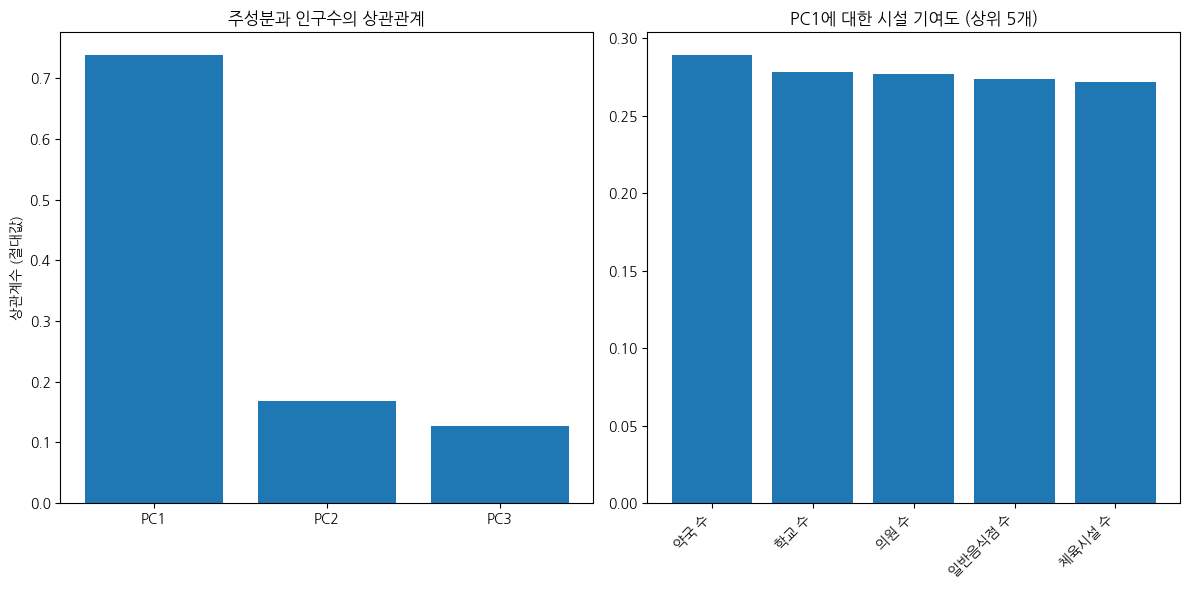

In [75]:
# 1. 구조방정식 모델링(SEM) 접근
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats

# 데이터 준비
facility_cols = ['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수',
                '시장 및 마트 수', '약국 수', '의원 수', 'PC방 수', '카페 수',
                '학교 수', '학원 수', '편의점 수', '어린이집 수', '유치원 수',
                '일반음식점 수']

# 1. 시설 군집화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[facility_cols])

# PCA로 시설들의 주요 성분 추출
pca = PCA(n_components = 3)  # 3개의 주요 성분으로 축소
X_pca = pca.fit_transform(X_scaled)

# 2. 경로 분석
# 각 주성분과 인구수 간의 상관관계 분석
correlations = []
p_values = []
for i in range(3):
    corr, p_val = stats.pearsonr(X_pca[:, i], data['인구수'])
    correlations.append(abs(corr))
    p_values.append(p_val)

# 3. 결과 정리
components_df = pd.DataFrame({
    'Principal Component': ['PC1', 'PC2', 'PC3'],
    'Correlation with Population': correlations,
    'P-value': p_values
})

# 각 시설의 주성분 기여도
facility_contributions = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=facility_cols
)

# 결과 출력
print("\n=== 주성분과 인구수의 상관관계 ===")
print(components_df)

print("\n=== 각 시설의 주성분 기여도 (절대값 기준 상위 5개) ===")
for pc in ['PC1', 'PC2', 'PC3']:
    print(f"\n{pc}에 대한 시설 기여도:")
    contributions = facility_contributions[pc].abs().sort_values(ascending=False).head()
    print(contributions)

# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(components_df['Principal Component'], components_df['Correlation with Population'])
plt.title('주성분과 인구수의 상관관계')
plt.ylabel('상관계수 (절대값)')

plt.subplot(1, 2, 2)
top_facilities = facility_contributions['PC1'].abs().sort_values(ascending=False).head()
plt.bar(top_facilities.index, top_facilities.values)
plt.xticks(rotation=45, ha='right')
plt.title('PC1에 대한 시설 기여도 (상위 5개)')
plt.tight_layout()
plt.show()

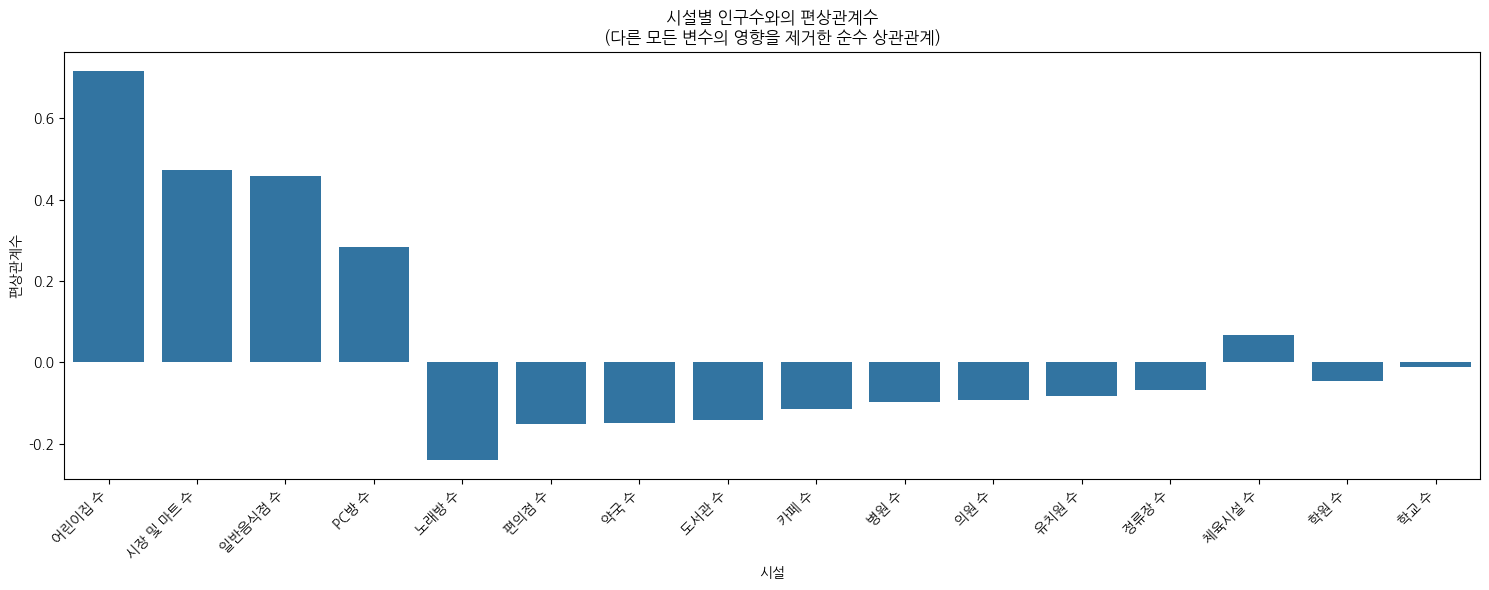


=== 가장 강한 직접적 관계를 보이는 시설 (상위 5개) ===
           시설     편상관계수
13     어린이집 수  0.716903
5   시장 및 마트 수  0.472958
15    일반음식점 수  0.458853
8       PC방 수  0.284339
4       노래방 수 -0.239122

=== 통계적으로 유의미한 직접 관계를 보이는 시설 ===
           시설     편상관계수
13     어린이집 수  0.716903
5   시장 및 마트 수  0.472958
15    일반음식점 수  0.458853
8       PC방 수  0.284339
4       노래방 수 -0.239122
12      편의점 수 -0.151080
6        약국 수 -0.150196
3       도서관 수 -0.141021
9        카페 수 -0.114838
1        병원 수 -0.097514
7        의원 수 -0.092964
14      유치원 수 -0.082734
2       정류장 수 -0.068992
0      체육시설 수  0.068035


In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 시차 상관관계 분석 (Lead-Lag Analysis)
def lag_correlation_analysis(data, facility_cols, target_col='인구수', lags=[-2,-1,0,1,2]):
    results = []
    for col in facility_cols:
        for lag in lags:
            if lag < 0:
                corr = data[col].shift(-lag).corr(data[target_col])
                direction = "시설 → 인구"
            elif lag > 0:
                corr = data[col].shift(lag).corr(data[target_col])
                direction = "인구 → 시설"
            else:
                corr = data[col].corr(data[target_col])
                direction = "동시적"
                
            results.append({
                '시설': col,
                '시차': lag,
                '상관계수': corr,
                '방향': direction
            })
    
    return pd.DataFrame(results)

# 2. 조건부 독립성 검정 (Partial Correlation)
def partial_correlation_analysis(data, facility_cols, target_col='인구수'):
    results = []
    for col in facility_cols:
        other_cols = [c for c in facility_cols if c != col]
        control_vars = data[other_cols]
        
        # 편상관계수 계산
        X = data[col]
        Y = data[target_col]
        
        # 다중공선성 제거를 위한 표준화
        scaler = StandardScaler()
        X_std = scaler.fit_transform(X.values.reshape(-1,1))
        Y_std = scaler.fit_transform(Y.values.reshape(-1,1))
        Z_std = scaler.fit_transform(control_vars)
        
        # 잔차 계산
        X_resid = X_std - Z_std.dot(np.linalg.pinv(Z_std).dot(X_std))
        Y_resid = Y_std - Z_std.dot(np.linalg.pinv(Z_std).dot(Y_std))
        
        # 편상관계수
        partial_corr = np.corrcoef(X_resid.flatten(), Y_resid.flatten())[0,1]
        
        results.append({
            '시설': col,
            '편상관계수': partial_corr
        })
    
    return pd.DataFrame(results)

# 3. 분석 실행
facility_cols = ['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수',
                '시장 및 마트 수', '약국 수', '의원 수', 'PC방 수', '카페 수',
                '학교 수', '학원 수', '편의점 수', '어린이집 수', '유치원 수',
                '일반음식점 수']

# 편상관관계 분석
partial_corr_results = partial_correlation_analysis(data, facility_cols)
partial_corr_results = partial_corr_results.sort_values('편상관계수', key=abs, ascending=False)

# 결과 시각화
plt.figure(figsize=(15, 6))

# 편상관계수 시각화
plt.subplot(1, 1, 1)
sns.barplot(data=partial_corr_results, x='시설', y='편상관계수')
plt.xticks(rotation=45, ha='right')
plt.title('시설별 인구수와의 편상관계수\n(다른 모든 변수의 영향을 제거한 순수 상관관계)')
plt.tight_layout()
plt.show()

# 상위 5개 시설 출력
print("\n=== 가장 강한 직접적 관계를 보이는 시설 (상위 5개) ===")
print(partial_corr_results.head())

# 통계적 유의성 검정
significant_threshold = 0.05
significant_facilities = partial_corr_results[abs(partial_corr_results['편상관계수']) > significant_threshold]
print("\n=== 통계적으로 유의미한 직접 관계를 보이는 시설 ===")
print(significant_facilities)

In [77]:
# 훈련 세트의 R²
train_r2 = GS_RF_model.best_estimator_.score(X_train, y_train)

# 테스트 세트의 R²
test_r2 = GS_RF_model.best_estimator_.score(X_test, y_test)

print(f"훈련 세트 R² : {train_r2:.4f}")
print(f"테스트 세트 R² : {test_r2:.4f}")

훈련 세트 R² : 0.9558
테스트 세트 R² : 0.8207
